# **Problem Formulation** 
We want to find and predict the **Reddit Fake Post Detection** given the other features .

False information on the Internet has caused many social problems due to the raise of social network and its role in different domains such as politics. In this assignment, we are going to predict if a specific reddit post is fake news or not, by looking at its title.



*   **Input** :- Comments as a text.

The data is raw (contains various forms of words)
*   **Output** :- Predected Faking for posts.


*   **Data Mining Function** :- Manipulating ,analyzing , preprocessing the data. 
*   **Challenges** ▶ : 
    1.   Nan cells.
    2.   Unused and unimportnat column.
    3.   Convert the dtype.
    4.   convert strings by One Hot encoding.
    5.   Handling unbalanced data by over sampling
*   **Impact** ▶ : Predicting the Fake posts that will lead to a successful social life.



Copyrights 2022 Master of science - Queens University - by/Mahmoud Khorshed


# 1- import libraries and Data

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
sns.set()
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

from time import time
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import classification_report,f1_score ,roc_auc_score
import re

#Grid Search
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV



#Models 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

from sklearn.neural_network import MLPClassifier
#NLP

import re
import pickle
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()
from pathlib import Path


# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from bokeh.models import NumeralTickFormatter


Loading BokehJS ...

## 1.2 - load Data

### install kaggle and get token Kaggle 

In [11]:
# # !pip install -q kaggle
# !mkdir ~/.kaggle
# from google.colab import files
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [12]:
# !kaggle competitions download -c cisc-873-dm-f22-a3   #Download data of competition "Fake_Reddit_Prediction"

 **read data from the *path***

In [13]:
# pd.set_option('display.max_colwidth', None)  #to display all row with its data
# pd.options.display.max_rows = 1000

# Load Data

# importing required modules
# from zipfile import ZipFile
  
# # specifying the zip file name
# file_name = "cisc-873-dm-f22-a3.zip"
  
# # opening the zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

data=pd.read_csv('xy_train.csv',index_col='id')

In [14]:
# data=pd.read_csv('/content/xy_t/rain.csv',index_col='id')
data.head()

,text,label
id,,
265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0


# 2- Exploratory *Data*

EDA explained using sample Data set:
To share my understanding of the concept and techniques I know,I’ll take an example of Data of product rating data set which is available on Iwish.com Machine Learning Repository and try to catch hold of as many insights from the data set using EDA.
To starts with,I imported necessary libraries (for this example pandas, numpy,matplotlib and seaborn) and loaded the data set. 

In [15]:
data.head()  #TO check

,text,label
id,,
265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0


**Get the shape of data**

In [16]:
data.shape # print the shape of Data

(60000, 2)

* Dataset comprises of 60000 observations and 1 Feature and 1 label .





In [17]:
data.info(verbose=True,memory_usage=True,show_counts=True) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 265723 to 34509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60000 non-null  object
 1   label   60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB




*   Data has  float , objects and integer values.




In [18]:
# anything missing?
data.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

*   There are not any columns have null/missing values.

**Get the columns and check unique values data**

In [19]:
# features=list(data.columns)

# for col in range(len(features)):   
#     count = len(data[features[col]].unique()) # printing unique values of each Feature
#     print("Number of unique values in %s ="%features[col],count)

# Another Easy WAy to do that without any increase in complexity by For Loop

data.nunique()


text     59645
label        3
dtype: int64

**Get the unique values of label  of data**

In [20]:
data['label'].unique()  #how many unique values and what they are.

array([0, 1, 2], dtype=int64)

* Target variable/Dependent variable is discrete and categorical in nature.
* “label” score scale ranges [0,1,2].

In [21]:
data[['label']].value_counts() 
     

label
0        32172
1        27596
2          232
dtype: int64

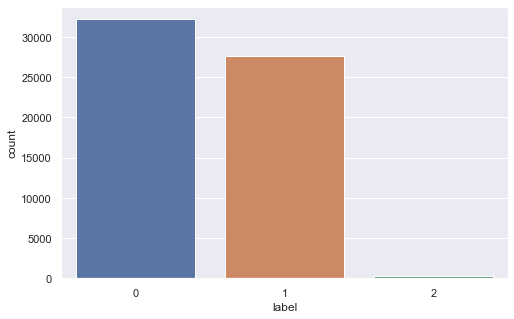

In [22]:
#Count plot match
plt.figure(figsize=(8,5))
ax = sns.countplot(x="label", data=data)
plt.show()

It is clear that the data is almost balanced but there is an outlier "2" .

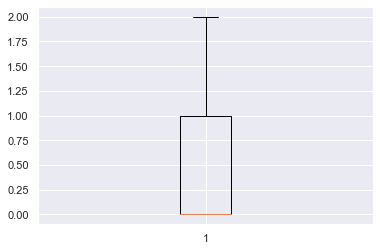

<Figure size 720x504 with 0 Axes>

In [23]:
plt.boxplot(data['label'])
fig = plt.figure(figsize =(10, 7))
plt.show()

# 3- Preprocessing

This function do many preprocssing steps


## 1- remove outliers

In [24]:
print("Before dropping outlier")
print(data["label"].value_counts(normalize=True))
data.drop(data.loc[data["label"]==2].index,inplace=True)
print("After dropping outlier")
print(data["label"].value_counts(normalize=True))


Before dropping outlier
0    0.536200
1    0.459933
2    0.003867
Name: label, dtype: float64
After dropping outlier
0    0.538281
1    0.461719
Name: label, dtype: float64


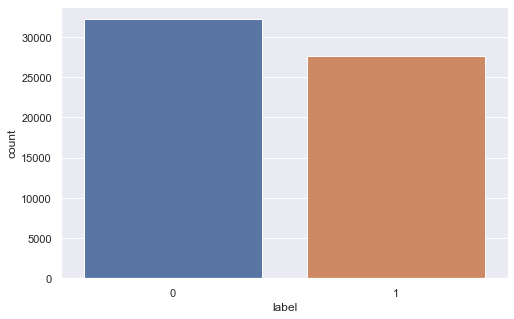

In [25]:
#Count plot match
plt.figure(figsize=(8,5))
ax = sns.countplot(x="label", data=data)
plt.show()

## Function Clean_Text

In [26]:
%%time
#nltk.download('punkt')
#nltk.download('stopwords')
# nltk.download('stem')
#nltk.download('wordnet')
"""
  For ENGlish Language  PorterStammer or LancasterStammer
  PorterStemmer uses Suffix Stripping ,
  PorterStemmer is known for its simplicity and speed.
""" 
from nltk.stem import PorterStemmer
Porter = PorterStemmer()
print("porter",Porter.stem("Studying"))

"""
  containing about 120 rules indexed by the last letter of a suffix.
  LancasterStemmer is simple, but heavy stemming due to iterations and
  over-stemming may occur. Over-stemming causes the stems to be not 
  linguistic, or they may have no meaning.
"""
from nltk.stem import LancasterStemmer
Lancaster = LancasterStemmer()
print("Lancster",Lancaster.stem("Studying"))

#  SnowballStemmers is not only English stemmers:.
#But it is improvement for Portal

Snowball = SnowballStemmer("english",ignore_stopwords=False) 
print("Snowball",Snowball.stem("Studying"))

"""
 these words are filtered out from search queries because
  they return a vast amount of unnecessary information.
"""  
stop_words = set(stopwords.words("english"))  #get the stop words and set ( unique them)

"""
Lemmatization, unlike Stemming, reduces the inflected words properly
 ensuring that the root word belongs to the language.
 it is used where it is necessary to get valid words.
            WordNet Lemmatizer

"""
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

""" 
the word ‘leaves’ without a POS tag would get lemmatized to
the word ‘leaf’, but with a verb tag, its lemma would become ‘leave’.
POS tagging is the task of assigning each word in a sentence the part of speech 
that it assumes in that sentence. The primary target of POS tagging is to
identify the grammatical group of a given word: whether it is a noun,
pronoun, adjective, verb, adverbs, etc. based on the context.
"""
#Tokenization is the process of segmenting running text into sentences and words.
#In essence, it’s the task of cutting a text into pieces called tokens.
#tokenizer separates the sentence into words

from nltk.tokenize import  word_tokenize



porter studi
Lancster study
Snowball studi
Wall time: 44.8 ms


In [27]:
#               [Porter,Lancaster,Snowball]
def clean_text(text,Stemmer=Snowball,Lemmatization=False, for_embedding=False):
    """
    Arguments = 
    Stemmer = [Porter,Lancaster,Snowball]
     steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
           if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    Return clean text    
    """
    # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-z]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)

    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)    
    words_tokens_lower = [word.lower() for word in word_tokens]
    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
      if Lemmatization==False:
        words_filtered = [
            Stemmer.stem(word) for word in words_tokens_lower if word not in stop_words]
      else:
        words_filtered = [
            wordnet.lemmatize(word, pos="v") for word in words_tokens_lower if word not in stop_words]
                    # parts-of-speech (POS) tagging.  v = Verbs >> (leaves = Leave) 

    text_clean = " ".join(words_filtered)
    return text_clean

Evaluate Clean Function

In [28]:
print(data.shape)
# Clean text
data["text_clean"] = data.loc[data["text"].str.len() > 20, "text"] # get rows with more than 5 words, other will NAN
data["text_clean"] = data["text_clean"].map(
    lambda x: clean_text(x,Stemmer=Snowball,Lemmatization=False, for_embedding=False) if isinstance(x, str) else x # if x STR >> clean data by function
)
print(data.shape)
# Drop when any of x missing
data = data[(data["text_clean"] != "") & (data["text_clean"] != "null")]

data = data.dropna(axis="index", subset=["text","label","text_clean"]).reset_index(drop=True)

print(data.shape)

(59768, 2)
(59768, 3)
(59758, 3)


# 4- Split + Train Models Without Random Search
Thoughts :- To get the best model for this data

By ***experimental*** : Logistic Regression - XGboosting - Neural Network 
are the best models 

## **Two different text preprocessing techniques**

 ### **1-TFIDF vectorizer**

In [29]:
TFvectorizer=TfidfVectorizer(ngram_range= (1, 3),
                             max_df = 0.9,min_df = 10,
                             analyzer= 'word',norm='l2')


### **2-Count vectorizer**


In [30]:
Ctvectorizer= CountVectorizer(analyzer='word', ngram_range=(1, 2),
                              max_df = 0.9,min_df = 10)


## **Split**

In [31]:
# feature creation and modelling in a single function
X=data.drop(['label','text'],axis=1)
y=data['label']


In [32]:
#Split
x_train, x_test, y_train, y_test =train_test_split(X['text_clean'],y,
                                                   train_size = 0.80,
                                                   stratify =y, random_state = 202)
print(x_train.shape)
x_train=TFvectorizer.fit_transform(x_train)
x_test=TFvectorizer.transform(x_test)
print(x_train.shape)


(47806,)
(47806, 8613)


## **Train Models**

### 1 - Decision Tree

In [33]:
%%time
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf_DT = DecisionTreeClassifier(max_depth=1000,criterion='entropy',max_features=700,min_samples_leaf=20) # you could try with GINI>> replace ('entropy') with ('gini') 
clf_DT.fit(x_train, y_train) 
pred_test = clf_DT.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))



0.7826092877516774
Wall time: 630 ms


### 2- AdaBoost Classifier with Decision Tree

In [34]:
%%time
classifier_ABC_GB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=50,
                                             max_features=100,min_samples_leaf=10,
                                            ),algorithm= 'SAMME',
                                       learning_rate= 0.082,n_estimators= 400)
classifier_ABC_GB.fit(x_train, y_train) 
pred_test = classifier_ABC_GB.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))


0.839968012372335
Wall time: 26.7 s


### 3- AdaBoost with RandomForest

In [30]:
%%time
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(n_estimators= 200,max_depth=40),algorithm= 'SAMME',
                                       learning_rate= 0.082,n_estimators= 100)
classifier_ABC_RF.fit(x_train, y_train) 
pred_test = classifier_ABC_RF.predict_proba(x_test)[:,1]

print(roc_auc_score(y_test,pred_test))

0.8695666936600769
Wall time: 14min 26s


### 4- XGBoost

In [25]:
%%time
import xgboost as xgb
classifier_XGBC = XGBClassifier(use_label_encoder=False,n_estimators=400,
                                max_depth=50,
                                objective='binary:logistic',eval_metric='mlogloss')

classifier_XGBC.fit(x_train, y_train) 
pred_test = classifier_XGBC.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))

0.8550121230934431
Wall time: 1min


### 5- Gradient Boost 

In [26]:
%%time
classifier_GBC = GradientBoostingClassifier(
    n_estimators=500,max_depth=50,
    max_features=500,min_samples_leaf=10,
                                            )

classifier_GBC.fit(x_train, y_train) 
pred_test = classifier_GBC.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))

0.86887632951887
Wall time: 1min 3s


### 6- Neural Network

In [27]:
%%time

from sklearn.neural_network import MLPClassifier

classifier_neural_MLP = MLPClassifier(
        random_state=123,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1)
classifier_neural_MLP.fit(x_train, y_train) 
pred_test = classifier_neural_MLP.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))

0.8723981569596905
Wall time: 1.3 s


### 7- Random Forest 

In [28]:
%%time
# Random forest 

classifier_RFC = RandomForestClassifier(n_estimators= 200,max_depth=40)
classifier_RFC.fit(x_train, y_train) 
pred_test = classifier_RFC.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))

0.8212775802382661
Wall time: 8.71 s


### 8- Logistic Regression

In [29]:
%%time
# Logistic regression 
Log_Reg = LogisticRegression(solver='sag',C= 1,  #sag is slow 50 sec on Colab but score > 0.87
                             penalty='l2' ,        #lbfgs is very fast  = .867
                             max_iter=1000)
Log_Reg.fit(x_train, y_train) 
pred_test = Log_Reg.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,pred_test))


0.8738309079494669
Wall time: 222 ms


### It is clear that the best models for this data are ( Logistic Regression - Neural Network - XG Boost - gradient boost):

* AdaBoost with RandomForest is good but take much time not good for optimization

# 5-Trials
## Training Model (Split - Pipeline) 
*5 trails*
All with **validation set** (not cross-validation).

We Will Cover both character-level vectorizer and word-level vectorizer in tuning .

1- Random Search with Logistic Regression (TFIDF vectorizer)

2-  Random Search with Logistic Regression. (Counter vectorizer)

3- Random Search with Random Forest

4-Random Search with XGBoost.

5- Random Search with Neural Network.


## At first 

When applying the fit method of the vectorizer in all dataset might introduce some data leakage. As principle,the model shouldn't see the test data. So to guarantee that your model will not see test data on the training fase, it should split first, vectorizer after.

I will do Random Search with **4** Classifiers.

1 Random Search for Logistic

1- Define Function For **Submission**

In [35]:
def make_submission(model,Test_data):
  
  print("Test shape ",Test_data.shape)

  Test_data["text_clean"] = Test_data["text"].map(
      lambda x: clean_text(x,Stemmer=Snowball,Lemmatization=False, for_embedding=False) if isinstance(x, str) else x)
  
  if Test_data.shape[0] != 59151:
      print("You can't upload because the file isn't equal with 59151 rows ")
      print(f"The difference is {59151-Test_data.shape[0]}")
  else :
      print("Good ...!!! You can upload Now")
  print("Test shape after preprocessing",Test_data.shape)
  print("Null = ",Test_data.isnull().sum().sum())
  submission = pd.DataFrame()
  submission['id'] = Test_data.index
  submission['label'] = model.predict_proba(Test_data['text_clean'])[:,1]
  

  return(submission.to_csv('Text_submission.csv', index=False))

2- **Load test data**

In [36]:
#Train
X=data.drop(['label','text'],axis=1)
y=data['label']
#test
X_Test=pd.read_csv(('x_test.csv'),index_col='id')  #Load test data


3- **Splitting data for validation set**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
x_train2, X_val, y_train2, y_val =train_test_split(X['text_clean'],y,
                                                   train_size = 0.7,
                                                   stratify = y,
                                                   random_state = 2022)

# Create a list where train data indices are -1 and validation data indices are 0

split_index = [-1 if x in x_train2.index else 0 for x in X.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

4- Make **Pipeline** (vectorizer + model )

## 1- Random Search with **Logistic Regression (TFIDF vectorizer)**



We can tune the hyperparameters (including different preprocessing configurations using Random Search with validation set).


The best hyperparameters are :- 
**Score** =  0.8752343380738591

**C'**:  1

 **penalty**': 'l2'
 
  **solver**': 'lbfgs'

**thoughts and observations for trial 1** :

We could search for many hyperparameters in Logistic Regression and choose the best .

**Plan for trial 2:**

I Found Score = 87%, Then we could try another Hyperparameter with same classifier for example **Logistic Regression** but with **Counter vectorizer**
  and search for best hyperparameters. 
  I guess that the accuracy will be high

In [38]:
# define parameter space to test # runtime 35min
params = {
    #Hyperparameter for TFIDFVectorizer  
    "tfidf__ngram_range": [(1, 2),(1,3)], # (1, 3)
    "tfidf__max_df": [0.4,0.5,0.6],    #0.3,0.5,,0.9
    "tfidf__min_df": [10],
    "tfidf__analyzer":["char","word"],  #,"char"
    "tfidf__norm":["l2"],
    
#     HYPERparamets for LogReg
    "LOG__solver":['lbfgs',"sag"],  #"sag", 'newton-cg','liblinear',
    "LOG__C":[1,1e-1],     #1e-1,,1e1,1e2
    "LOG__penalty":['l2'],

}

pipe = Pipeline([("tfidf", TfidfVectorizer()),("LOG",LogisticRegression(random_state=2022,max_iter=5000))]) 


In [39]:
%%time
pipe_LOG_TFIDF = RandomizedSearchCV(
    pipe, params, n_jobs=-1,cv=pds,verbose=1 ,scoring="roc_auc", n_iter=20)
pipe_LOG_TFIDF.fit(X['text_clean'],y) #.values.astype('U')

print('best Parameters {}'.format(pipe_LOG_TFIDF.best_params_))
print('best score ROC_AUC {}'.format(pipe_LOG_TFIDF.best_score_))


Fitting 1 folds for each of 20 candidates, totalling 20 fits
best Parameters {'tfidf__norm': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 10, 'tfidf__max_df': 0.5, 'tfidf__analyzer': 'word', 'LOG__solver': 'lbfgs', 'LOG__penalty': 'l2', 'LOG__C': 1}
best score ROC_AUC 0.872004632813468
Wall time: 19.3 s


##### **Make submission file**

In [40]:
model=pipe_LOG_TFIDF # for make submission
make_submission(model,X_Test)

Test shape  (59151, 1)
Good ...!!! You can upload Now
Test shape after preprocessing (59151, 2)
Null =  0


## 2- Random Search with **Logistic Regression. (Counter vectorizer)**

We can tune the hyperparameters (including different preprocessing configurations using Random Search with validation set).


The best hyperparameters are :- 
**Score** = 0.83

**C'**: 0.1

 **penalty**': 'l2'
 
  **solver**': 'lbfgs'

**thoughts and observations for trial 2** :
I thought the score would be high but it lower than previous,It becomes 83% less than by -4

**Plan for trial 3**

So,I could try another classifier with another Hyperparameter for example **Random Forest**
  and search for best hyperparameters. 
  I guess that the accuracy will be great because it depend on Decision tree with probabilites.

In [47]:
# define parameter space to test # runtime 35min
params = {
    #Hyperparameter for CounterVectorizer  
    "CntVec__ngram_range": [(2, 2),(1,3),(2,3)], # (1, 3)
    "CntVec__max_df": [0.4,0.5,0.6],    #0.3,0.5,,0.9
    "CntVec__min_df": [8,9,10],
    "CntVec__analyzer":["char","word"],  #,"char"
    
    
#     HYPERparamets for LogReg
    "LOG__solver":['lbfgs',"sag"],  #"sag", 'newton-cg','liblinear',
    "LOG__C":[1,1e-1],     #1e-1,,1e1,1e2
    "LOG__penalty":['l2'],

}

pipe = Pipeline([("CntVec", CountVectorizer()),("LOG",LogisticRegression(random_state=2022,max_iter=5000))]) 


In [48]:
%%time
pipe_LOG_CNT = RandomizedSearchCV(
    pipe, params, n_jobs=-1,cv=pds,verbose=1 ,scoring="roc_auc", n_iter=10)
pipe_LOG_CNT.fit(X['text_clean'],y) #.values.astype('U')

print('best Parameters {}'.format(pipe_LOG_CNT.best_params_))
print('best score ROC_AUC {}'.format(pipe_LOG_CNT.best_score_))


Fitting 1 folds for each of 10 candidates, totalling 10 fits
best Parameters {'LOG__solver': 'lbfgs', 'LOG__penalty': 'l2', 'LOG__C': 0.1, 'CntVec__ngram_range': (1, 3), 'CntVec__min_df': 9, 'CntVec__max_df': 0.6, 'CntVec__analyzer': 'char'}
best score ROC_AUC 0.830271494300785
Wall time: 6min 33s


##### **Make submission file**

In [43]:
model=pipe_LOG_CNT # for make submission
make_submission(model,X_Test)

Test shape  (59151, 2)
Good ...!!! You can upload Now
Test shape after preprocessing (59151, 2)
Null =  0


## 3- Random Search with  With **Random Forest**



**best score**  = 0.81

**best hyperparameters**


  **max_depth**':  20

 
  **n_estimators** : 400

**thoughts and observations for trial 3** :

The results wasn't the best for my thoughts because **Random Forest** is a great classifier, but it is still good.
but i think it needs more tuning for more wide variaty of hyperparameters but my GPU doesn't help me as needed.

  
**Plan for trial 4**

I could try another classifier with another Hyperparameter for example **XGboost**
  and search for best hyperparameters. 
  I guess that the accuracy will be the greatest because it is extreme gradient boost.

  

In [46]:
%%time
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
# define parameter space to test # runtime 35min
params = {
    #Hyperparameter for TFIDFVectorizer  
    "tfidf__ngram_range": [(1, 2)], # (1, 3)
    "tfidf__max_df": [0.7,0.9],    #0.3,0.5,,0.9
    "tfidf__min_df": [10],
    "tfidf__analyzer":["word","char"],  #,"char"
    "tfidf__norm":["l2"],
    
#     HYPERparamets for GB
    "RF__n_estimators":[200,400],
    "RF__max_depth":[10,20],
    
    
 
}

pipe = Pipeline([("tfidf", TfidfVectorizer()),
                 ("RF", RandomForestClassifier())])
# i was using a tfidftransformer,without using a countvectorizer before it.
# Instead, just  I used a tfidfvectorizer which does both in one go.

pipe_RF = RandomizedSearchCV(
    pipe, params, n_jobs=-1,cv=pds,verbose=1 ,scoring="roc_auc", n_iter=5)
pipe_RF.fit(X['text_clean'].values.astype('U'),y)

print('best Parameters {}'.format(pipe_RF.best_params_))
print('best score ROC_AUC {}'.format(pipe_RF.best_score_))


Fitting 1 folds for each of 5 candidates, totalling 5 fits
best Parameters {'tfidf__norm': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 10, 'tfidf__max_df': 0.7, 'tfidf__analyzer': 'word', 'RF__n_estimators': 400, 'RF__max_depth': 20}
best score ROC_AUC 0.8100621899952997
Wall time: 4min 50s


##### **Make submission file**

In [ ]:
model=pipe_GB # for make submission
make_submission(model,X_Test)

## 4- Random Search with **XGBoost**

**best score**  = 0.87545684

we could try  with its hyperparameters

**best hyperparameters**=


**n_estimators**': 50

**max_depth**': 100

**learning_rate**':  0.03



**thoughts and observations for trial 4** :

I tried it out and it gives me result 87% similar to **Logistic Regreesion** but my computational resources couldn't run the random search with many hyperparameters .

**Plan for trial 5**

I could try another Hyperparameter with another classifier for example **Neural Network**
  and search for best hyperparameters. 
  I guess that the accuracy will be perfect because it is deep learning,the state of the art for Machine Learning .

In [ ]:
%%time
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
# define parameter space to test # runtime 35min
params = {
    #Hyperparameter for TFIDFVectorizer  
    "tfidf__ngram_range": [(1, 2),(1,3)], # (1, 3)
    "tfidf__max_df": [0.7,0.9],    #0.3,0.5,,0.9
    "tfidf__min_df": [8,10],
    "tfidf__analyzer":["word"],  #,"char"
    "tfidf__norm":["l2"],
    
#     HYPERparamets for GB
    "XGB__n_estimators":[20,50],
    "XGB__max_depth":[6,10],
    "XGB__learning_rate":[0.03,0.1],
    }
    
 
    # objective='binary:logistic'


pipe = Pipeline([("tfidf", TfidfVectorizer()),
                 ("XGB", XGBClassifier(use_label_encoder=False,
                                      eval_metric='mlogloss'))])



pipe_XGB = RandomizedSearchCV(
    pipe, params, n_jobs=-1,cv=pds,verbose=1 ,scoring="roc_auc", n_iter=5)
pipe_XGB.fit(X['text_clean'].values.astype('U'),y)

print('best Parameters {}'.format(pipe_XGB.best_params_))
print('best score ROC_AUC {}'.format(pipe_XGB.best_score_))


Fitting 1 folds for each of 5 candidates, totalling 5 fits


##### **Make submission file**

In [ ]:
model=pipe_XGB # for make submission
make_submission(model,Test_data)

## 5- Random Search with **Neural Network**

The best hyperparameters are :- 
**Score** = 0.868


**'MLP__solver'**: 'adam'

**'activation'** : 'tanh'


**thoughts and observations for trial 5** :
It gives another good results and it is simple ,It is suitable for fast deployment because it is optimized and learn fast . it chooces the Adam solver of-course because it the optimal optimizer until now.





In [49]:
# define parameter space to test 
from sklearn.neural_network import MLPClassifier

params = {
    #Hyperparameter for TFIDFVectorizer  
    "tfidf__ngram_range": [(1, 2),(1,3)], # (1, 3)
    "tfidf__max_df": [0.7,0.8],    #0.3,0.5,,0.9
    "tfidf__min_df": [8,10],
    "tfidf__analyzer":["char","word"],  #,"char"
    "tfidf__norm":["l2","l1"],
    
#     HYPERparamets for LogReg
    "MLP__solver":['adam','sgd'], 
    "MLP__activation":["relu","tanh"],     
    

}

        

pipe = Pipeline([("tfidf", TfidfVectorizer()),
                 ("MLP",MLPClassifier(random_state=2022,
                                      hidden_layer_sizes=(12, 12, 12),
                                      early_stopping=True,
                                      n_iter_no_change=1))]) 


In [50]:
%%time
pipe_MLP = RandomizedSearchCV(
    pipe, params, n_jobs=-1,cv=pds,verbose=1 ,scoring="roc_auc", n_iter=5)
pipe_MLP.fit(X['text_clean'],y) #.values.astype('U')

print('best Parameters {}'.format(pipe_MLP.best_params_))
print('best score ROC_AUC {}'.format(pipe_MLP.best_score_))


Fitting 1 folds for each of 5 candidates, totalling 5 fits
best Parameters {'tfidf__norm': 'l2', 'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 10, 'tfidf__max_df': 0.8, 'tfidf__analyzer': 'word', 'MLP__solver': 'adam', 'MLP__activation': 'tanh'}
best score ROC_AUC 0.8685589396163849
Wall time: 15.4 s


##### **Make submission file**

In [ ]:
model=pipe_MLP # for make submission
make_submission(model,X_Test)

# Finally the best model is **Logistic Regression** 


# َQuestions 

**1-  What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?**


* An n-gram model is a technique of counting sequences of ( characters or words) that allows us to support rich pattern discovery in text.

* Character n-gram :     

it is a sequence of characters  like (A - H - K)

* word n-gram :     

It is a sequence of words like (play - walk up )


 word n-gram suffer more for OOV
 
Ref : 
STACC, OOVDensity and N-gram Saturation: Vicomtech’s Participation in the WMT2018Shared Task on Parallel Corpus Filtering
1- https://aclanthology.org/W18-6473.pdf

2- https://web.stanford.edu/~jurafsky/slp3/3.pdf

**2- What is the difference between stop word removal and stemming? Are these techniques language-dependent?**

* **stop word** :     

They are a lot of vocabulary don't have any effect on the meaning and repeated,So we removed the from the text.

 these words are filtered out from search queries because
  they return a vast amount of unnecessary information.

* **Stemming** : 

it returns the word to its root ,a stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate”

* They are language-dependent

**3-Is tokenization techniques language dependent? Why?**

* No , Beacuse it split every word or character as type (string) independent of input languages .

* Like Function ( **is.alpha()** ) return bool value if the string if totally alphabetic [A-Za-z]

**4-What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

**Count Vectorizers**

Count Vectorizer is a way to convert a given set of strings into a frequency representation.

Count Vectors can be helpful in understanding the type of text by the frequency of words in it. But its major disadvantages are:

** Its inability in identifying more important and less important words for analysis.
** It will just consider words that are abundant in a corpus as the most statistically significant word.
** It also doesn't identify the relationships between words such as linguistic similarity between words.

**TF-IDF:**

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

It would not be able to use all n-grams, but we could select them with random search to get best score .